In [82]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
messages = pd.read_csv('gartner_er.csv')
messages.describe()

,Title
count,400
unique,338
top,Helbiz Announces Google Workspace Integration ...
freq,14


In [17]:
messages['length'] = messages['Title'].apply(len)

In [18]:
messages

,Title,length
0,"Start A Business, Get An MSc - The University ...",75
1,"Empire BlueCross CEO, president: Innovation st...",71
2,Report: 76% of manufacturers plan to adopt pri...,61
3,AI Weekly: AI model training costs on the rise...,83
4,Growing the U.S. AI Workforce,29
...,...,...
395,Redesign Recruiting Strategies to Hire Quality...,53
396,5 Trends From the Gartner Hype Cycle for Suppl...,68
397,3 Sustainable Retailing Practices for Supply C...,58
398,Future of Sales 2025: Data-Driven B2B Selling ...,71


<AxesSubplot:ylabel='Frequency'>

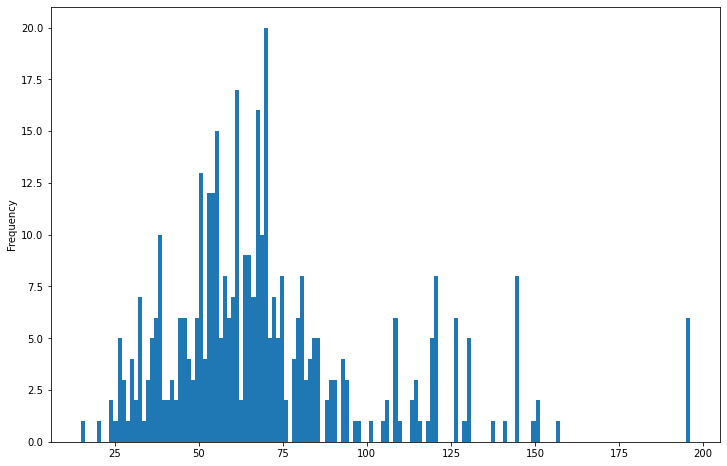

In [23]:
plt.figure(figsize=(12, 8))
messages['length'].plot(kind='hist', bins=150)

In [24]:
messages.length.describe()

count    400.000000
mean      70.980000
std       32.018785
min       15.000000
25%       52.000000
50%       65.000000
75%       81.000000
max      196.000000
Name: length, dtype: float64

In [28]:
messages[messages.length == 116]['Title'].iloc[0]

'NUS, Facebook AI and other world-class universities collaborate to teach AI to understand the world through our eyes'

In [54]:
import spacy

In [55]:
nlp = spacy.load("en_core_web_sm")

In [56]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [85]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
hashtags = [('#' + x[0]) for x in Counter(output).most_common(20)]


print(' '.join(hashtags))
# print(hashtags)

#data #digital #security #business #new #google #strategy #key #ai #integration #trends #october #industry #helbiz #workspace #market #global #analytics #world #week


In [31]:
# from nltk.corpus import stopwords
# import string

In [81]:
# stopwords.words('english')

In [33]:
# def word_processing(message):
#     strip_punctuation = [character for character in message if character not in string.punctuation]
#     strip_punctuation = ''.join(strip_punctuation)
#     remove_stopwords = [word for word in strip_punctuation.split() if word.lower() not in stopwords.words('english')]
#     return remove_stopwords

In [36]:
#bow_transformer = CountVectorizer(analyzer=word_processing).fit(messages['Title'])